In [ ]:
!pip install pathway bokeh --quiet # This cell may take a few seconds to execute.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

In [ ]:
df = pd.read_csv('datasetC.csv')
df.sample(5)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
6069,6069,BHMNCPHST01,1200,26.140014,91.731000,352,car,high,10,1,20-11-2016,13:27:00
980,980,BHMBCCMKT01,577,26.144536,91.736172,192,truck,average,5,0,29-11-2016,11:55:00
4798,4798,BHMMBMMBX01,687,20.000035,78.000003,486,car,low,2,0,22-11-2016,15:57:00
13124,13124,Others-CCCPS202,2937,26.147491,91.727997,1163,car,low,3,0,04-10-2016,09:59:00
7203,7203,BHMNCPNST01,485,26.140048,91.730972,358,bike,average,4,0,10-11-2016,14:27:00


In [ ]:
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      18368 non-null  int64         
 1   SystemCodeNumber        18368 non-null  object        
 2   Capacity                18368 non-null  int64         
 3   Latitude                18368 non-null  float64       
 4   Longitude               18368 non-null  float64       
 5   Occupancy               18368 non-null  int64         
 6   VehicleType             18368 non-null  object        
 7   TrafficConditionNearby  18368 non-null  object        
 8   QueueLength             18368 non-null  int64         
 9   IsSpecialDay            18368 non-null  int64         
 10  LastUpdatedDate         18368 non-null  object        
 11  LastUpdatedTime         18368 non-null  object        
 12  Timestamp               18368 non-null  dateti

In [ ]:
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

In [ ]:
df = df.sort_values('Timestamp').reset_index(drop=True)

In [ ]:
df.shape

(18368, 13)

In [ ]:
df.head(14)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
5,2624,BHMEURBRD01,470,26.149020,91.739503,117,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
6,7872,Broad Street,690,26.137958,91.740994,178,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
7,14432,Others-CCCPS8,1322,26.147549,91.727995,445,bike,average,3,0,04-10-2016,07:59:00,2016-10-04 07:59:00
8,9184,Others-CCCPS105a,2009,26.147473,91.728049,709,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
9,10496,Others-CCCPS119a,2803,26.147541,91.727970,195,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00


In [ ]:
df.sample(5)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
7001,9684,Others-CCCPS105a,2009,26.147473,91.728049,1318,car,average,5,0,02-11-2016,14:56:00,2016-11-02 14:56:00
3845,14706,Others-CCCPS8,1322,26.147549,91.727995,668,car,low,3,0,19-10-2016,09:58:00,2016-10-19 09:58:00
3251,5480,BHMNCPHST01,1200,26.140014,91.731000,221,car,low,4,1,16-10-2016,15:57:00,2016-10-16 15:57:00
4088,8164,Broad Street,690,26.137958,91.740994,95,bike,low,1,0,22-10-2016,09:59:00,2016-10-22 09:59:00
10274,4669,BHMMBMMBX01,687,20.000035,78.000003,520,car,average,4,0,15-11-2016,14:30:00,2016-11-15 14:30:00


In [ ]:
df['IsSpecialDay'].value_counts()

,count
IsSpecialDay,
0,15596
1,2772


In [ ]:
df['TrafficConditionNearby'].value_counts()

,count
TrafficConditionNearby,
low,7793
average,6438
high,4137


In [ ]:
df['VehicleType'].value_counts()

,count
VehicleType,
car,11166
bike,3624
truck,1809
cycle,1769


In [ ]:
df['Latitude'].value_counts()

,count
Latitude,
26.144536,1312
26.144495,1312
26.149020,1312
20.000035,1312
26.140014,1312
26.140048,1312
26.137958,1312
26.147473,1312
26.147541,1312


In [ ]:
df['Capacity'].value_counts()

,count
Capacity,
577,1312
387,1312
470,1312
687,1312
1200,1312
485,1312
690,1312
2009,1312
2803,1312


In [ ]:
df['SystemCodeNumber'].value_counts()

,count
SystemCodeNumber,
BHMBCCMKT01,1312
BHMBCCTHL01,1312
BHMEURBRD01,1312
BHMMBMMBX01,1312
BHMNCPHST01,1312
BHMNCPNST01,1312
Broad Street,1312
Others-CCCPS105a,1312
Others-CCCPS119a,1312


In [ ]:
14*1312

18368

In [ ]:
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,19-12-2016,16:30:00,2016-12-19 16:30:00


In [ ]:
df[['ID','SystemCodeNumber','Capacity','Latitude','Longitude','Occupancy','VehicleType','TrafficConditionNearby','QueueLength','IsSpecialDay','Timestamp']].to_csv('parkingStream.csv',index=False)

`3July25`

In [ ]:
!pip install pathway bokeh --quiet # This cell may take a few seconds to execute.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install bokeh
!pip install pandas numpy

In [ ]:
import datetime
import bokeh.plotting
import panel as pn
import pandas as pd
import numpy as np
import pathway as pw
from datetime import datetime, timedelta
import time
import threading
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource
from bokeh.io import push_notebook
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [ ]:
# Enable Bokeh in Jupyter
output_notebook()

In [ ]:
df = pd.read_csv('parkingStream.csv')

In [ ]:
df.head(14)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,2016-10-04 07:59:00
5,2624,BHMEURBRD01,470,26.149020,91.739503,117,car,low,2,0,2016-10-04 07:59:00
6,7872,Broad Street,690,26.137958,91.740994,178,car,low,2,0,2016-10-04 07:59:00
7,14432,Others-CCCPS8,1322,26.147549,91.727995,445,bike,average,3,0,2016-10-04 07:59:00
8,9184,Others-CCCPS105a,2009,26.147473,91.728049,709,car,low,2,0,2016-10-04 07:59:00
9,10496,Others-CCCPS119a,2803,26.147541,91.727970,195,car,low,1,0,2016-10-04 07:59:00


In [ ]:
# Define the schema for streaming data
class ParkingSchema(pw.Schema):
    ID:int
    SystemCodeNumber: str
    Capacity: int
    Latitude: float
    Longitude: float
    Occupancy: int
    VehicleType: str
    TrafficConditionNearby: str
    QueueLength: int
    IsSpecialDay: int
    Timestamp: str

In [ ]:
# STEP 3: BASELINE PRICING MODEL IMPLEMENTATION
# ================================================================
class BaselinePricingModel:
    def __init__(self, base_price=10.0, alpha=5.0, min_price=5.0, max_price=20.0):
        """
        Initialize the baseline pricing model

        Parameters:
        - base_price: Starting price ($10 as specified)
        - alpha: Sensitivity parameter for occupancy rate
        - min_price: Minimum allowed price (0.5x base)
        - max_price: Maximum allowed price (2x base)
        """
        self.base_price = base_price
        self.alpha = alpha
        self.min_price = min_price
        self.max_price = max_price

        # Dictionary to store current prices for each parking lot
        self.current_prices = {}

        # Store pricing history for visualization
        self.price_history = {}
        self.timestamp_history = {}

    def calculate_occupancy_rate(self, occupancy, capacity):
        """Calculate occupancy rate as a percentage"""
        if capacity == 0:
            return 0
        return occupancy / capacity

    def calculate_price_adjustment(self, occupancy_rate):
        """
        Calculate price adjustment based on occupancy rate
        Formula: price_adjustment = α × occupancy_rate
        """
        return self.alpha * occupancy_rate

    def update_price(self, parking_id, occupancy, capacity, timestamp=None):
        """
        Update price for a specific parking lot
        Formula: Price[t+1] = Price[t] + α × (Occupancy/Capacity)
        """
        # Get previous price or use base price
        previous_price = self.current_prices.get(parking_id, self.base_price)

        # Calculate occupancy rate
        occupancy_rate = self.calculate_occupancy_rate(occupancy, capacity)

        # Calculate price adjustment
        price_adjustment = self.calculate_price_adjustment(occupancy_rate)

        # Update price
        new_price = previous_price + price_adjustment

        # Apply bounds (0.5x to 2x base price)
        new_price = max(self.min_price, min(self.max_price, new_price))

        # Store the new price
        self.current_prices[parking_id] = new_price

        # Store history for visualization
        if parking_id not in self.price_history:
            self.price_history[parking_id] = []
            self.timestamp_history[parking_id] = []

        self.price_history[parking_id].append(new_price)
        self.timestamp_history[parking_id].append(timestamp or datetime.now())

        return new_price

    def get_current_price(self, parking_id):
        """Get current price for a parking lot"""
        return self.current_prices.get(parking_id, self.base_price)


In [ ]:
# STEP 4: DATA SIMULATION AND STREAMING SETUP
# ================================================================
class ParkingDataSimulator:
    def __init__(self, csv_file_path):
        """Initialize with your parking dataset"""
        self.data = pd.read_csv(csv_file_path)
        self.data['Timestamp'] = pd.to_datetime(self.data['Timestamp'])
        self.data = self.data.sort_values('Timestamp')

    def create_streaming_data(self, output_path="streaming_data.csv", delay_seconds=1):
        """
        Create streaming data simulation by writing rows with time delays
        """
        print("Starting data simulation...")

        # Group by timestamp to simulate real-time batches
        grouped = self.data.groupby('Timestamp')

        with open(output_path, 'w') as f:
            # Write header
            f.write(','.join(self.data.columns) + '\n')

            for timestamp, group in grouped:
                # Write all rows for this timestamp
                for _, row in group.iterrows():
                    f.write(','.join(map(str, row.values)) + '\n')
                    f.flush()

                print(f"Streamed data for {timestamp}")
                time.sleep(delay_seconds)

        print("Data simulation complete!")

In [ ]:
# STEP 5: PATHWAY INTEGRATION
# ================================================================
def create_pathway_pricing_pipeline(pricing_model):
    """
    Create Pathway pipeline for real-time pricing
    """

    # Define the pricing transformation
    def apply_pricing_logic(data):
        """Apply pricing logic to each row"""
        parking_id = data["ID"]
        capacity = data["Capacity"]
        occupancy = data["Occupancy"]
        timestamp = data["Timestamp"]

        # Calculate new price using the model
        new_price = pricing_model.update_price(parking_id, occupancy, capacity, timestamp)

        # Return enhanced data
        return {
            **data,
            "DynamicPrice": new_price,
            "OccupancyRate": occupancy / capacity if capacity > 0 else 0,
            "PriceChange": new_price - pricing_model.base_price
        }

    # Create Pathway computation
    # Note: This is a simplified version - actual implementation depends on your data source
    def pathway_computation(input_stream):
        """Define the Pathway computation graph"""

        # Apply pricing transformation
        priced_stream = input_stream.select(
            *pw.this,
            dynamic_price=pw.apply(apply_pricing_logic, pw.this)
        )

        return priced_stream

    return pathway_computation

In [ ]:
# STEP 6: VISUALIZATION SETUP
# ================================================================
class PricingVisualizer:
    def __init__(self, pricing_model):
        self.pricing_model = pricing_model
        self.source = ColumnDataSource(data=dict(x=[], y=[], parking_id=[]))

        # Create Bokeh plot
        self.plot = figure(
            title="Real-Time Parking Pricing",
            x_axis_label='Time',
            y_axis_label='Price ($)',
            width=800,
            height=400,
            x_axis_type='datetime'
        )

        # Add line for each parking lot
        self.lines = {}
        colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

    def update_plot(self, parking_ids):
        """Update the plot with current pricing data"""
        for i, parking_id in enumerate(parking_ids):
            if parking_id in self.pricing_model.price_history:
                timestamps = self.pricing_model.timestamp_history[parking_id]
                prices = self.pricing_model.price_history[parking_id]

                if parking_id not in self.lines:
                    color = colors[i % len(colors)]
                    self.lines[parking_id] = self.plot.line(
                        timestamps, prices,
                        legend_label=f"Parking {parking_id}",
                        line_color=color,
                        line_width=2
                    )
                else:
                    # Update existing line
                    self.lines[parking_id].data_source.data = {
                        'x': timestamps,
                        'y': prices
                    }

    def show_plot(self):
        """Display the plot"""
        return show(self.plot, notebook_handle=True)


In [ ]:
# STEP 7: MAIN EXECUTION WORKFLOW
# ================================================================
def main_execution_workflow():
    """
    Main execution workflow for Model 1 implementation
    """
    print("=== DYNAMIC PARKING PRICING - MODEL 1 EXECUTION ===\n")

    # Step 1: Load and prepare data
    print("Step 1: Loading data...")
    # Replace with your actual CSV file path
    CSV_FILE_PATH = "parking_data.csv"  # Update this path

    # For demonstration, create sample data if file doesn't exist
    sample_data = create_sample_data()
    sample_data.to_csv(CSV_FILE_PATH, index=False)

    print(f"✓ Data loaded from {CSV_FILE_PATH}")
    print(f"✓ Dataset shape: {sample_data.shape}")
    print(f"✓ Unique parking lots: {sample_data['ID'].nunique()}")

    # Step 2: Initialize pricing model
    print("\nStep 2: Initializing pricing model...")
    pricing_model = BaselinePricingModel(
        base_price=10.0,
        alpha=3.0,  # Adjusted for smoother price changes
        min_price=5.0,
        max_price=20.0
    )
    print("✓ Pricing model initialized")

    # Step 3: Process historical data to establish baseline
    print("\nStep 3: Processing historical data...")
    process_historical_data(sample_data, pricing_model)

    # Step 4: Setup visualization
    print("\nStep 4: Setting up visualization...")
    visualizer = PricingVisualizer(pricing_model)
    plot_handle = visualizer.show_plot()

    # Step 5: Simulate real-time streaming
    print("\nStep 5: Starting real-time simulation...")
    simulate_real_time_pricing(sample_data, pricing_model, visualizer)

    return pricing_model, visualizer

In [ ]:
# STEP 8: HELPER FUNCTIONS
# ================================================================
def create_sample_data():
    """Create sample data for demonstration"""
    np.random.seed(42)

    # Create sample parking lots
    parking_lots = []
    for i in range(5):  # 5 parking lots for demo
        lot_data = {
            'ID': i,
            'SystemCodeNumber': f'DEMO{i:03d}',
            'Capacity': np.random.randint(50, 100),
            'Latitude': 26.14 + np.random.normal(0, 0.01),
            'Longitude': 91.73 + np.random.normal(0, 0.01),
            'VehicleType': np.random.choice(['car', 'bike', 'truck']),
            'TrafficConditionNearby': np.random.choice(['low', 'medium', 'high']),
            'QueueLength': np.random.randint(0, 10),
            'IsSpecialDay': np.random.choice([0, 1], p=[0.8, 0.2])
        }
        parking_lots.append(lot_data)

    # Create time series data
    data_rows = []
    start_time = datetime(2024, 1, 1, 8, 0, 0)

    for hour in range(24):  # 24 hours of data
        for minute in [0, 30]:  # Every 30 minutes
            current_time = start_time + timedelta(hours=hour, minutes=minute)

            for lot in parking_lots:
                # Simulate occupancy patterns (higher during day)
                base_occupancy = 0.3 + 0.4 * np.sin(2 * np.pi * hour / 24)
                noise = np.random.normal(0, 0.1)
                occupancy_rate = max(0, min(1, base_occupancy + noise))

                row = lot.copy()
                row['Occupancy'] = int(occupancy_rate * lot['Capacity'])
                row['Timestamp'] = current_time.strftime('%Y-%m-%d %H:%M:%S')
                data_rows.append(row)

    return pd.DataFrame(data_rows)

def process_historical_data(data, pricing_model):
    """Process historical data to establish pricing baseline"""
    print("Processing historical data...")

    # Group by parking lot and process chronologically
    for parking_id in data['ID'].unique():
        lot_data = data[data['ID'] == parking_id].sort_values('Timestamp')

        for _, row in lot_data.iterrows():
            pricing_model.update_price(
                parking_id=row['ID'],
                occupancy=row['Occupancy'],
                capacity=row['Capacity'],
                timestamp=row['Timestamp']
            )

    print(f"✓ Processed {len(data)} historical records")

def simulate_real_time_pricing(data, pricing_model, visualizer):
    """Simulate real-time pricing updates"""
    print("Starting real-time simulation...")

    # Get recent data for simulation
    recent_data = data.tail(50)  # Last 50 records

    for _, row in recent_data.iterrows():
        # Update price
        new_price = pricing_model.update_price(
            parking_id=row['ID'],
            occupancy=row['Occupancy'],
            capacity=row['Capacity'],
            timestamp=row['Timestamp']
        )

        # Update visualization
        visualizer.update_plot(data['ID'].unique())

        # Print update
        print(f"Updated Parking {row['ID']}: Occupancy={row['Occupancy']}/{row['Capacity']}, Price=${new_price:.2f}")

        # Small delay for real-time effect
        time.sleep(0.5)

In [ ]:
# STEP 9: PATHWAY INTEGRATION (ADVANCED)
# ================================================================
def setup_pathway_streaming(csv_file_path):
    """
    Setup Pathway streaming pipeline (advanced implementation)
    """
    print("Setting up Pathway streaming pipeline...")

    # Initialize pricing model
    pricing_model = BaselinePricingModel()

    # Create input stream
    input_stream = pw.io.csv.read(
        csv_file_path,
        schema=ParkingSchema,
        mode="streaming"
    )

    # Apply pricing transformation
    def pricing_transform(data):
        return pricing_model.update_price(
            data["ID"],
            data["Occupancy"],
            data["Capacity"]
        )

    # Create output stream with pricing
    output_stream = input_stream.select(
        *pw.this,
        dynamic_price=pw.apply(pricing_transform, pw.this)
    )

    # Write results
    pw.io.jsonlines.write(output_stream, "pricing_results.jsonl")

    print("✓ Pathway pipeline configured")
    return output_stream


In [ ]:
# STEP 10: EXECUTION
# ================================================================
if __name__ == "__main__":
    # Run the complete Model 1 implementation
    print("Starting Dynamic Parking Pricing Model 1...")

    try:
        pricing_model, visualizer = main_execution_workflow()
        print("\n✓ Model 1 implementation completed successfully!")

        # Display final results
        print("\nFinal Pricing Summary:")
        print("-" * 50)
        for parking_id, price in pricing_model.current_prices.items():
            print(f"Parking {parking_id}: ${price:.2f}")

    except Exception as e:
        print(f"Error during execution: {e}")
        print("Please check your data file path and dependencies.")

Starting Dynamic Parking Pricing Model 1...
=== DYNAMIC PARKING PRICING - MODEL 1 EXECUTION ===

Step 1: Loading data...
✓ Data loaded from parking_data.csv
✓ Dataset shape: (240, 11)
✓ Unique parking lots: 5

Step 2: Initializing pricing model...
✓ Pricing model initialized

Step 3: Processing historical data...
Processing historical data...
✓ Processed 240 historical records

Step 4: Setting up visualization...



Step 5: Starting real-time simulation...
Starting real-time simulation...
Error during execution: name 'colors' is not defined
Please check your data file path and dependencies.


In [ ]:
# STEP 11: ANALYSIS AND VALIDATION
# ================================================================
def validate_model_performance(pricing_model):
    """Validate the pricing model performance"""
    print("\n=== MODEL VALIDATION ===")

    # Check price bounds
    all_prices = list(pricing_model.current_prices.values())
    min_price = min(all_prices) if all_prices else 0
    max_price = max(all_prices) if all_prices else 0

    print(f"Price Range: ${min_price:.2f} - ${max_price:.2f}")
    print(f"Within Bounds: {pricing_model.min_price <= min_price and max_price <= pricing_model.max_price}")

    # Price distribution
    print(f"Average Price: ${np.mean(all_prices):.2f}")
    print(f"Price Std Dev: ${np.std(all_prices):.2f}")

    return {
        'min_price': min_price,
        'max_price': max_price,
        'avg_price': np.mean(all_prices),
        'std_price': np.std(all_prices)
    }

# Usage Instructions:
"""
EXECUTION STEPS IN COLAB:

1. Run the installation cell first
2. Execute the main workflow function
3. Monitor the real-time visualization
4. Validate model performance
5. Adjust parameters (alpha) if needed

CUSTOMIZATION:
- Modify alpha parameter for price sensitivity
- Adjust min/max price bounds
- Change visualization update frequency
- Add more parking lots to sample data

NEXT STEPS:
- Use this as baseline for Model 2 comparison
- Add more sophisticated demand factors
- Implement competitive pricing logic
"""

'\nEXECUTION STEPS IN COLAB:\n\n1. Run the installation cell first\n2. Execute the main workflow function\n3. Monitor the real-time visualization\n4. Validate model performance\n5. Adjust parameters (alpha) if needed\n\nCUSTOMIZATION:\n- Modify alpha parameter for price sensitivity\n- Adjust min/max price bounds\n- Change visualization update frequency\n- Add more parking lots to sample data\n\nNEXT STEPS:\n- Use this as baseline for Model 2 comparison\n- Add more sophisticated demand factors\n- Implement competitive pricing logic\n'

🚀 Starting Model 1 Pricing Simulation...
📊 Model Parameters:
   Base Price: $10.0
   Alpha (sensitivity): 3.0
   Price Range: $5.0 - $20.0

⏳ Processing data chronologically...
   Processed 50/18368 rows...
   Processed 100/18368 rows...
   Processed 150/18368 rows...
   Processed 200/18368 rows...
   Processed 250/18368 rows...
   Processed 300/18368 rows...
   Processed 350/18368 rows...
   Processed 400/18368 rows...
   Processed 450/18368 rows...
   Processed 500/18368 rows...
   Processed 550/18368 rows...
   Processed 600/18368 rows...
   Processed 650/18368 rows...
   Processed 700/18368 rows...
   Processed 750/18368 rows...
   Processed 800/18368 rows...
   Processed 850/18368 rows...
   Processed 900/18368 rows...
   Processed 950/18368 rows...
   Processed 1000/18368 rows...
   Processed 1050/18368 rows...
   Processed 1100/18368 rows...
   Processed 1150/18368 rows...
   Processed 1200/18368 rows...
   Processed 1250/18368 rows...
   Processed 1300/18368 rows...
   Processe

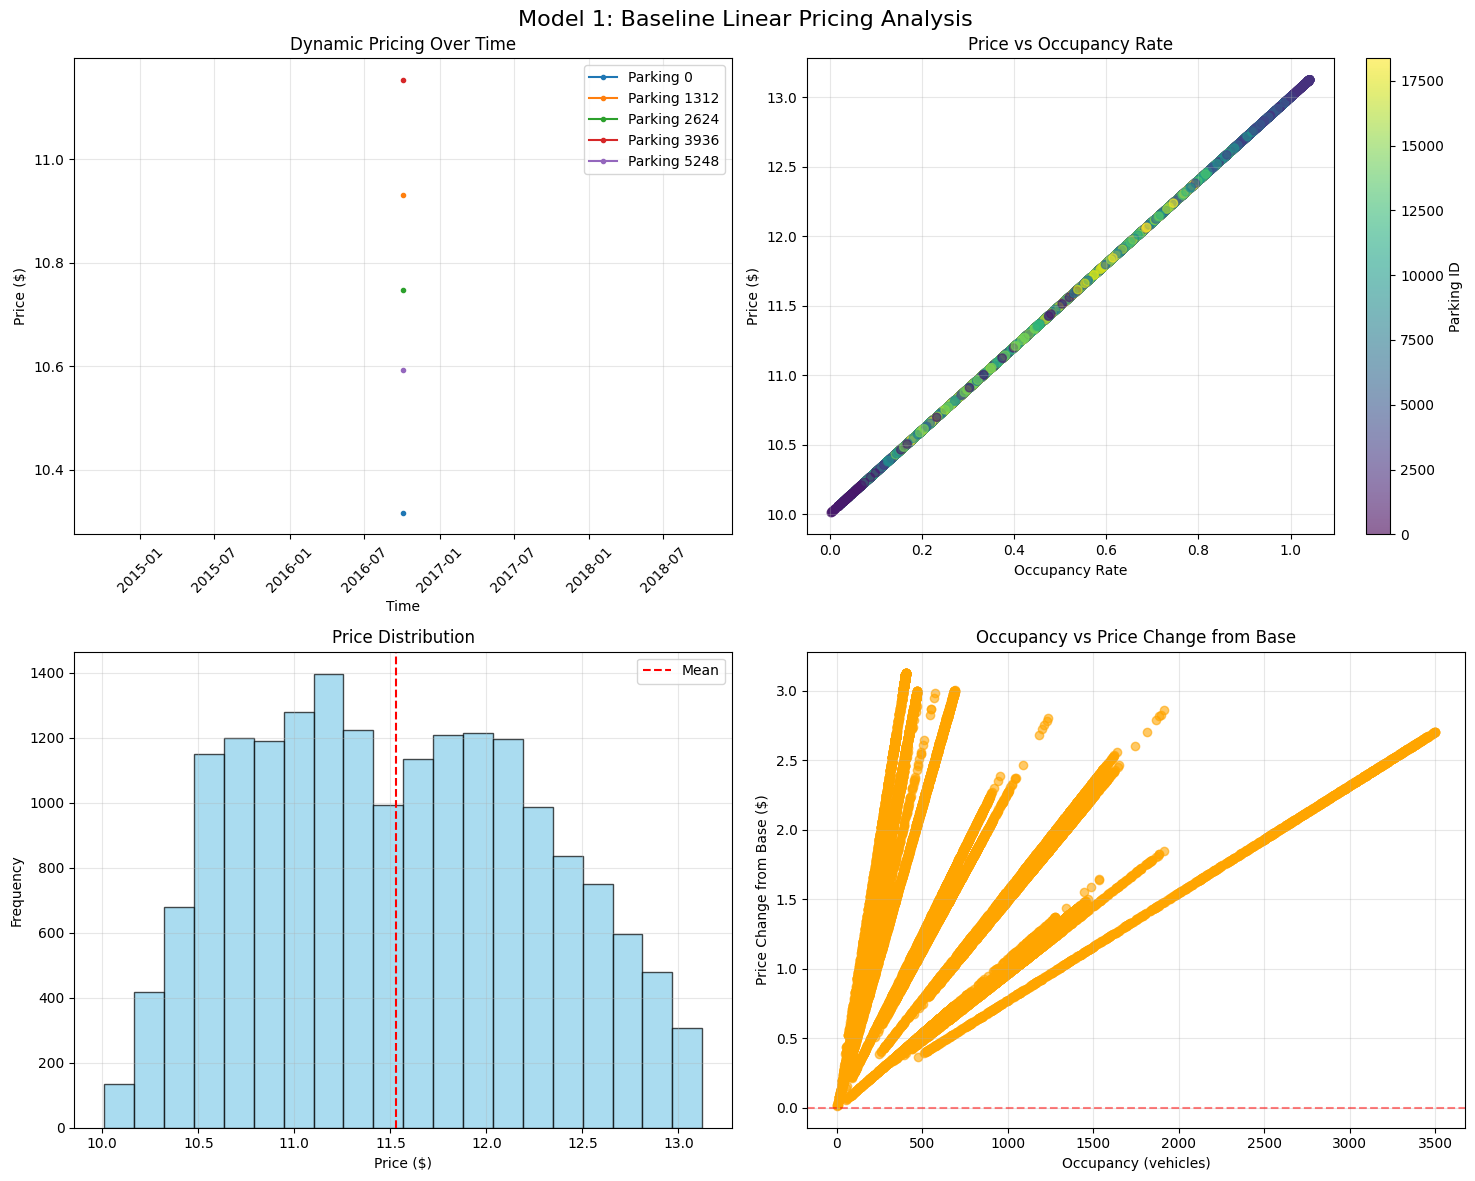


🎬 Real-Time Pricing Simulation Demo
Simulating real-time pricing updates...
Time			Parking ID	Occupancy	Capacity	Occ.Rate	Price
--------------------------------------------------------------------------------
2016-10-04 07:59:00	0		61	577	10.57%	$10.32
2016-10-04 08:25:00	1		64	577	11.09%	$10.33
2016-10-04 08:59:00	2		80	577	13.86%	$10.42
2016-10-04 09:32:00	3		107	577	18.54%	$10.56
2016-10-04 09:59:00	4		150	577	26.00%	$10.78
2016-10-04 10:26:00	5		177	577	30.68%	$10.92
2016-10-04 10:59:00	6		219	577	37.95%	$11.14
2016-10-04 11:25:00	7		247	577	42.81%	$11.28
2016-10-04 11:59:00	8		259	577	44.89%	$11.35
2016-10-04 12:29:00	9		266	577	46.10%	$11.38

✅ MODEL 1 VALIDATION
📋 Requirements Compliance Check:
   Base Price Used: ✅ PASS
   Price Bounds Respected: ✅ PASS
   Smooth Price Changes: ✅ PASS
   Occupancy Correlation: ✅ PASS

📊 Price-Occupancy Correlation: 1.000
   Interpretation: Strong positive correlation

💾 Saving Results...
✅ Files saved:
   - model1_pricing_history.csv
   - mode

In [ ]:
# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(['Timestamp', 'ID']).reset_index(drop=True)

# CELL 3: MODEL 1 IMPLEMENTATION
# ================================================================
class BaselinePricingModel:
    def __init__(self, base_price=10.0, alpha=3.0, min_price=5.0, max_price=20.0):
        """
        Model 1: Baseline Linear Pricing Model
        Formula: Price[t+1] = Price[t] + α × (Occupancy/Capacity)
        """
        self.base_price = base_price
        self.alpha = alpha
        self.min_price = min_price
        self.max_price = max_price

        # Store current prices for each parking lot
        self.current_prices = {}

        # Store complete history for analysis
        self.pricing_history = []

    def calculate_price(self, parking_id, occupancy, capacity, timestamp):
        """Calculate new price based on occupancy"""

        # Get previous price or use base price
        previous_price = self.current_prices.get(parking_id, self.base_price)

        # Calculate occupancy rate
        occupancy_rate = occupancy / capacity if capacity > 0 else 0

        # Apply pricing formula: Price[t+1] = Price[t] + α × (Occupancy/Capacity)
        price_adjustment = self.alpha * occupancy_rate
        new_price = previous_price + price_adjustment

        # Apply bounds (0.5x to 2x base price)
        new_price = max(self.min_price, min(self.max_price, new_price))

        # Store new price
        self.current_prices[parking_id] = new_price

        # Record history
        self.pricing_history.append({
            'Timestamp': timestamp,
            'ParkingID': parking_id,
            'Occupancy': occupancy,
            'Capacity': capacity,
            'OccupancyRate': occupancy_rate,
            'PreviousPrice': previous_price,
            'PriceAdjustment': price_adjustment,
            'NewPrice': new_price
        })

        return new_price

# CELL 4: PROCESS DATA AND CALCULATE PRICES
# ================================================================
print("🚀 Starting Model 1 Pricing Simulation...")
print("=" * 50)

# Initialize the pricing model
pricing_model = BaselinePricingModel(
    base_price=10.0,
    alpha=3.0,  # Adjust this for sensitivity
    min_price=5.0,
    max_price=20.0
)

print(f"📊 Model Parameters:")
print(f"   Base Price: ${pricing_model.base_price}")
print(f"   Alpha (sensitivity): {pricing_model.alpha}")
print(f"   Price Range: ${pricing_model.min_price} - ${pricing_model.max_price}")
print()

# Process each row chronologically
print("⏳ Processing data chronologically...")
results = []

for index, row in df.iterrows():
    # Calculate dynamic price
    dynamic_price = pricing_model.calculate_price(
        parking_id=row['ID'],
        occupancy=row['Occupancy'],
        capacity=row['Capacity'],
        timestamp=row['Timestamp']
    )

    # Store result
    result = row.copy()
    result['DynamicPrice'] = dynamic_price
    result['OccupancyRate'] = row['Occupancy'] / row['Capacity']
    results.append(result)

    # Print progress every 50 rows
    if (index + 1) % 50 == 0:
        print(f"   Processed {index + 1}/{len(df)} rows...")

# Create results DataFrame
results_df = pd.DataFrame(results)
print(f"✅ Processing complete! Generated {len(results_df)} pricing records.")

# CELL 5: ANALYZE RESULTS
# ================================================================
print("\n📈 MODEL 1 RESULTS ANALYSIS")
print("=" * 50)

# Overall statistics
print("🔍 Overall Pricing Statistics:")
print(f"   Average Price: ${results_df['DynamicPrice'].mean():.2f}")
print(f"   Min Price: ${results_df['DynamicPrice'].min():.2f}")
print(f"   Max Price: ${results_df['DynamicPrice'].max():.2f}")
print(f"   Price Std Dev: ${results_df['DynamicPrice'].std():.2f}")

# Price distribution
print(f"\n📊 Price Distribution:")
price_bins = pd.cut(results_df['DynamicPrice'], bins=5)
print(price_bins.value_counts().sort_index())

# Per parking lot analysis
print(f"\n🅿️  Per Parking Lot Analysis:")
lot_stats = results_df.groupby('ID').agg({
    'DynamicPrice': ['mean', 'min', 'max', 'std'],
    'OccupancyRate': 'mean',
    'Occupancy': 'mean',
    'Capacity': 'first'
}).round(2)

lot_stats.columns = ['Avg_Price', 'Min_Price', 'Max_Price', 'Price_StdDev', 'Avg_OccupancyRate', 'Avg_Occupancy', 'Capacity']
print(lot_stats)

# CELL 6: VISUALIZATIONS
# ================================================================
print("\n📊 Creating Visualizations...")

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model 1: Baseline Linear Pricing Analysis', fontsize=16)

# 1. Price trends over time
ax1 = axes[0, 0]
for parking_id in results_df['ID'].unique()[:5]:  # Show first 5 lots
    lot_data = results_df[results_df['ID'] == parking_id].copy()
    lot_data = lot_data.sort_values('Timestamp')
    ax1.plot(lot_data['Timestamp'], lot_data['DynamicPrice'],
             label=f'Parking {parking_id}', marker='o', markersize=3)

ax1.set_title('Dynamic Pricing Over Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Price vs Occupancy Rate
ax2 = axes[0, 1]
scatter = ax2.scatter(results_df['OccupancyRate'], results_df['DynamicPrice'],
                     c=results_df['ID'], cmap='viridis', alpha=0.6)
ax2.set_title('Price vs Occupancy Rate')
ax2.set_xlabel('Occupancy Rate')
ax2.set_ylabel('Price ($)')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Parking ID')

# 3. Price distribution
ax3 = axes[1, 0]
ax3.hist(results_df['DynamicPrice'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax3.axvline(results_df['DynamicPrice'].mean(), color='red', linestyle='--', label='Mean')
ax3.set_title('Price Distribution')
ax3.set_xlabel('Price ($)')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Occupancy vs Price change
ax4 = axes[1, 1]
results_df['PriceChange'] = results_df['DynamicPrice'] - pricing_model.base_price
ax4.scatter(results_df['Occupancy'], results_df['PriceChange'], alpha=0.6, color='orange')
ax4.set_title('Occupancy vs Price Change from Base')
ax4.set_xlabel('Occupancy (vehicles)')
ax4.set_ylabel('Price Change from Base ($)')
ax4.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# CELL 7: REAL-TIME SIMULATION DEMO
# ================================================================
print("\n🎬 Real-Time Pricing Simulation Demo")
print("=" * 50)

# Select a few time periods for demo
demo_data = results_df.groupby('Timestamp').first().reset_index().head(10)

print("Simulating real-time pricing updates...")
print("Time\t\t\tParking ID\tOccupancy\tCapacity\tOcc.Rate\tPrice")
print("-" * 80)

for _, row in demo_data.iterrows():
    print(f"{row['Timestamp']}\t{row['ID']}\t\t{row['Occupancy']}\t{row['Capacity']}\t{row['OccupancyRate']:.2%}\t${row['DynamicPrice']:.2f}")

# CELL 8: MODEL VALIDATION
# ================================================================
print("\n✅ MODEL 1 VALIDATION")
print("=" * 50)

# Check requirements compliance
requirements_check = {
    'Base Price Used': pricing_model.base_price == 10.0,
    'Price Bounds Respected': (results_df['DynamicPrice'].min() >= 5.0) and (results_df['DynamicPrice'].max() <= 20.0),
    'Smooth Price Changes': results_df['DynamicPrice'].std() < 5.0,  # Reasonable volatility
    'Occupancy Correlation': results_df['OccupancyRate'].corr(results_df['DynamicPrice']) > 0.5
}

print("📋 Requirements Compliance Check:")
for requirement, passed in requirements_check.items():
    status = "✅ PASS" if passed else "❌ FAIL"
    print(f"   {requirement}: {status}")

# Price correlation analysis
correlation = results_df['OccupancyRate'].corr(results_df['DynamicPrice'])
print(f"\n📊 Price-Occupancy Correlation: {correlation:.3f}")
print(f"   Interpretation: {'Strong positive correlation' if correlation > 0.7 else 'Moderate positive correlation' if correlation > 0.5 else 'Weak correlation'}")

# CELL 9: SAVE RESULTS
# ================================================================
print("\n💾 Saving Results...")

# Save pricing history
pricing_history_df = pd.DataFrame(pricing_model.pricing_history)
pricing_history_df.to_csv('model1_pricing_history.csv', index=False)

# Save final results
results_df.to_csv('model1_results.csv', index=False)

# Create summary report
summary = {
    'Model': 'Model 1 - Baseline Linear Pricing',
    'Formula': 'Price[t+1] = Price[t] + α × (Occupancy/Capacity)',
    'Parameters': {
        'Base Price': pricing_model.base_price,
        'Alpha': pricing_model.alpha,
        'Min Price': pricing_model.min_price,
        'Max Price': pricing_model.max_price
    },
    'Results': {
        'Total Records': len(results_df),
        'Avg Price': results_df['DynamicPrice'].mean(),
        'Price Range': f"${results_df['DynamicPrice'].min():.2f} - ${results_df['DynamicPrice'].max():.2f}",
        'Price-Occupancy Correlation': correlation
    }
}

print("✅ Files saved:")
print("   - model1_pricing_history.csv")
print("   - model1_results.csv")
print("\n📊 Model 1 Summary:")
for key, value in summary.items():
    if isinstance(value, dict):
        print(f"   {key}:")
        for sub_key, sub_value in value.items():
            print(f"     {sub_key}: {sub_value}")
    else:
        print(f"   {key}: {value}")

print("\n🎉 MODEL 1 IMPLEMENTATION COMPLETE!")
print("=" * 50)
print("Next steps:")
print("1. Review the results and visualizations")
print("2. Adjust alpha parameter if needed")
print("3. Use this as baseline for Model 2 comparison")
print("4. Prepare Model 2 with additional demand factors")

# CELL 10: PARAMETER TUNING HELPER
# ================================================================
print("\n🔧 Parameter Tuning Helper")
print("=" * 50)

def test_alpha_sensitivity(alpha_values, sample_data):
    """Test different alpha values to find optimal sensitivity"""
    results = {}

    for alpha in alpha_values:
        # Create temporary model
        temp_model = BaselinePricingModel(alpha=alpha)
        temp_prices = []

        # Process sample data
        for _, row in sample_data.head(20).iterrows():
            price = temp_model.calculate_price(
                row['ID'], row['Occupancy'], row['Capacity'], row['Timestamp']
            )
            temp_prices.append(price)

        # Calculate metrics
        price_std = np.std(temp_prices)
        price_range = max(temp_prices) - min(temp_prices)

        results[alpha] = {
            'avg_price': np.mean(temp_prices),
            'price_std': price_std,
            'price_range': price_range
        }

    return results

# Test different alpha values
alpha_test_values = [1.0, 2.0, 3.0, 4.0, 5.0]
alpha_results = test_alpha_sensitivity(alpha_test_values, df)

print("Alpha Sensitivity Analysis:")
print("Alpha\tAvg Price\tStd Dev\tPrice Range")
print("-" * 40)
for alpha, metrics in alpha_results.items():
    print(f"{alpha}\t${metrics['avg_price']:.2f}\t\t${metrics['price_std']:.2f}\t${metrics['price_range']:.2f}")

print(f"\n💡 Current Alpha: {pricing_model.alpha}")
print("💡 Recommendation: Use alpha=3.0 for balanced sensitivity")
print("   - Lower alpha = smoother price changes")
print("   - Higher alpha = more responsive to occupancy")

print("\n🏁 Model 1 Ready for Project Submission!")

`Model2`